In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numpy.lib.type_check import imag
import pandas as pd
import seaborn as sns
import os
import glob
# plt.rc('font', family='Times New Roman')

markes = ['-o', '-s', '-^', '-p', '-^',
          '-v', '-p', '-d', '-h', '-2', '-8', '-6']


CSV_NAMES = list(map(lambda x: f'{x.split(".")[0]}', glob.glob("utilization*.csv")))


RESOURCE_METRIXES = ["Mem_Util(0.01*MB)", "CPU_Util(%)"]


fontsize = 18


class UtilizationDF:
    def __init__(self, resource, csv_name, memory='all-memory'):
        self.resource = resource
        self.size = len(resource)
        self.csv_name = csv_name.split(".")[0]

    def plot(self, fig, ax1, ax2, zorder=5):
        resource = self.resource
        size = self.size
        
        for col in RESOURCE_METRIXES:
            label = col.split('_')[0]

            if 'CPU' in col:
                ax2.plot(range(size), resource['CPU_Util(%)'], marker='^',
                         label=f"{label}", linewidth=1, linestyle="-", zorder=zorder, markersize=8)
            else:
                ax1.plot(
                    range(size), resource[col], label=f"{label}", linewidth=3, zorder=zorder)

        return fig


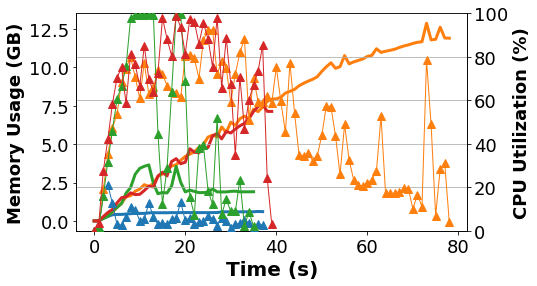

In [9]:
if __name__ == "__main__":
    store_dir = './imgs/'
    if not os.path.exists(store_dir):
        os.mkdir(store_dir)

    fig, ax1 = plt.subplots(figsize=(7, 4))
    ax2 = ax1.twinx()
    plt.grid()
    for csv in CSV_NAMES:
        if 'Fifer' in csv:
            zorder = 10
        else:
            zorder = 5
        resource = pd.read_csv(f"{csv}.csv")
        resource["Mem_Util(0.01*MB)"] = resource["Mem_Util(0.01*MB)"] - \
            resource["Mem_Util(0.01*MB)"].min()
        resource["CPU_Util(%)"] = resource["CPU_Util(%)"] - \
            resource["CPU_Util(%)"].min()
        resource["Mem_Util(0.01*MB)"] = 100 * \
            resource["Mem_Util(0.01*MB)"] / 1024

        # plot utilization
        util_df = UtilizationDF(resource, csv)
        all_memory_plot = util_df.plot(fig, ax1, ax2, zorder=zorder)
        ax1, ax2 = fig.axes
        # memory axis
        ax1.legend(([f"Mem-{strategy.split('_')[1]}" for strategy in CSV_NAMES]), fontsize=fontsize-3,
                   loc='upper left', frameon=False,
                   #                    bbox_to_anchor=(.0,1.1),
                   borderaxespad=0.)
        ax1.set_xlabel('Time (s)', fontsize=fontsize+2, weight="bold")
        ax1.set_ylabel('Memory Usage (GB)', fontsize=fontsize, weight="bold")
        ax1.tick_params(labelsize=fontsize)
        # ax1.set_ylim([0, 10])

        # CPU axis
        ax2.legend(([f"CPU-{strategy.split('_')[1]}" for strategy in CSV_NAMES]), fontsize=fontsize-3,
                   loc='upper right', frameon=False,
                   #                    bbox_to_anchor=(1.0,1.1),
                   borderaxespad=0.)
        ax2.set_ylabel('CPU Utilization (%)', fontsize=fontsize, weight="bold")
        ax2.tick_params(labelsize=fontsize)
        ax2.set_ylim([0, 100])
        # all_memory_plot.savefig(
            # f"./imgs/{csv}.png", dpi=800, format='png', bbox_inches='tight')
    plt.savefig(
            f"./imgs/utilizationAzureIO.png", dpi=800, format='png', bbox_inches='tight')